In [ ]:
recog_dict = {"0/0" : "वाटर", "0/1" : "कूलर", "0/2" : "रूम", "1/0" : "अंग्रेजी", "2/0" : "जल", "2/1" : "ही", "2/2" : "जीवन", "2/3" : "है", "2/4" : "पीने", "2/5" : "का", "2/6" : "सादा", "2/7" : "पानी", "3/0" : "पुलिस", "3/1" : "थाना"}

In [ ]:
trans_dict = {"वाटर" : "WATER", "कूलर" : "COOLER", "रूम" : "ROOM", "अंग्रेजी" : "ANGREJI", "जल": "JAL", "ही" : "HI", "जीवन" : "JIVAN", "है" : "HA", "पीने" : "PINE", "का" : "KAA", "सादा" : "SAADAA", "पानी" : "PAANI", "पुलिस" : "PULIS", "थाना" : "THAANAA"}

In [ ]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.7/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.7/dist-packages (0.6.0+cu101)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-i3ir7roc
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-i3ir7roc
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263917 sha256=84b45b3d1b56a17f22532061bf60bbacdbdbf8acc6409c06a6156a5e87210083
  Stored in directory: /tmp/pip-ephem-wheel-cache-3o59k1wn/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0
1.8.1+cu101 False
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Fre

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import pandas as pd
import cv2
import random
import os
import PIL
from natsort import natsorted
from google.colab.patches import cv2_imshow as gcpimshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

#import model training libraries
from sklearn.model_selection import train_test_split

In [ ]:
!git clone https://github.com/VishnuTeja-0/vernacular-languages-signboard-translation.git

fatal: destination path 'vernacular-languages-signboard-translation' already exists and is not an empty directory.


In [ ]:
# import some common libraries
import numpy as np
import pandas as pd
import cv2
import random
import os
import PIL
import time
from natsort import natsorted
from google.colab.patches import cv2_imshow as gcpimshow

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np

# Instantiates the device to be used as GPU/CPU based on availability
device_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

import random

# Dataset Preparation

In [ ]:
# Dataset paths
train_images_superfolder_path = "/content/vernacular-languages-signboard-translation/Model/Datasets/Text Detection 2/train/images"
train_annotations_superfolder_path = "/content/vernacular-languages-signboard-translation/Model/Datasets/Text Detection 2/train/annotations"

test_images_path = "/content/vernacular-languages-signboard-translation/Model/Datasets/Text Detection 2/dev/images"
test_annotations_path = "/content/vernacular-languages-signboard-translation/Model/Datasets/Text Detection 2/dev/annotations"


In [ ]:
main_result=pd.DataFrame(columns=["file_name","height","width","annotations"])
main_result["annotations"]=main_result["annotations"].astype('object')

In [ ]:
# Checking subfolder iteration
list_of_annotation_files = []
list_of_image_files = []
for ann, img in zip(natsorted(os.listdir(train_annotations_superfolder_path)), natsorted(os.listdir(train_images_superfolder_path))):
  list_of_annotation_files.append(ann)
  list_of_image_files.append(img)

In [ ]:
print(list_of_annotation_files)

In [ ]:
# converting the above list to dictionaries
image_file_dict = {}
for i in range(len(list_of_image_files)):
  image_file_dict[i+1] = list_of_image_files[i]

annotation_file_dict = {}
for i in range(len(list_of_annotation_files)):
  annotation_file_dict[i+1] = list_of_annotation_files[i]

None
None
None
None
None


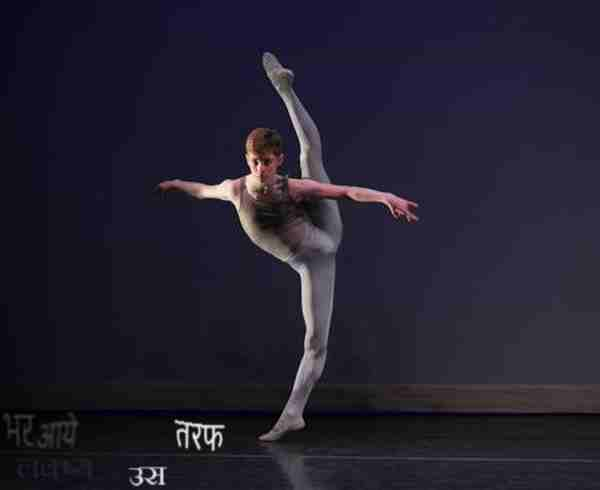

None
None
None
None


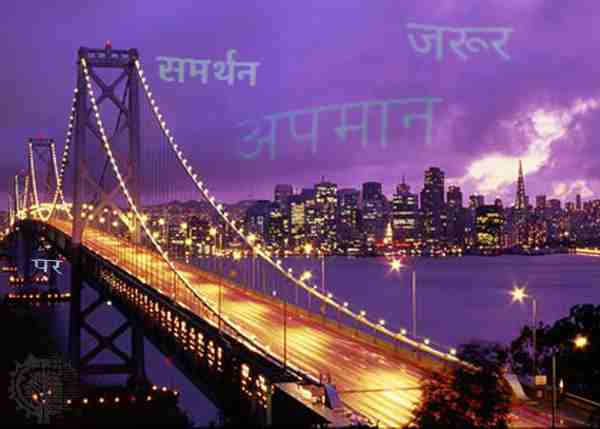

None


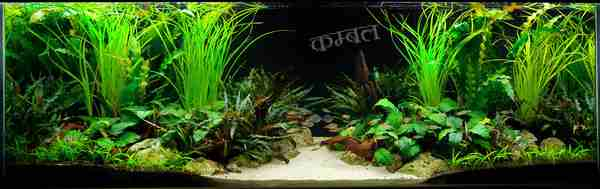

In [ ]:
# sample of images from dataset
sample_items = random.sample(list_of_image_files, 3)
for i in range(3):
  image_loc = train_images_superfolder_path + "/"  + sample_items[i]
  crop_image(image_loc)
  img = cv2.imread(image_loc)
  gcpimshow(img)

In [ ]:
word_output_dict = {}
for i in range(len(list_of_image_files)):
  word_output_dict[i] = []

In [ ]:
cat_dict = {"HINDI":"0"}
header_list = ["x1", "x2", "x3", "x4","y1", "y2","y3", "y4", "category_id"]

In [ ]:
def crop_image(image_loc):
    annotation_loc = image_loc[ : -3].replace("images", "annotations") + "txt"
    df = pd.read_csv(annotation_loc, delimiter = ' ', header = None, index_col=False, names=header_list)

    image = PIL.Image.open(image_loc)
    for index, row in df.iterrows():
      # left = row['x1']
      # top = row['y1']
      # right = row['x3']
      # bottom = row['y3']
      # cropped_image = image.crop((left, top, right, bottom))
      cropped_image = image.crop((100, 50, 200, 100))
      # print(left, top, right, bottom, row['category_id'])
      print(cropped_image.show())
      # print(row['category_id'])

In [ ]:
k = 0
file_list = list_of_annotation_files
for i in file_list:
  file_path = train_annotations_superfolder_path + "/" + i
  df = pd.read_csv(file_path,delimiter = ' ',header = None,index_col=False,names=header_list)
  df["height"] = abs(df["y1"]-df["y3"])
  df["width"] = abs(df["x1"]-df["x3"])
  df=df[["x1","y1","width","height","category_id"]]
  word_output_dict[key].append(df["category_id"])
  df["category_id"] = "HINDI"
  df1=df

  df1["bbox"] = df1.iloc[:,0:4].values.tolist()
  df1["bbox_mode"] = 1
  df1 = df1.replace({"category_id": cat_dict})
  df1=df1[["bbox",	"bbox_mode",	"category_id"]]
  annotations = df1.T.to_dict().values()
  l = []
  for j in annotations:
    l.append(j)
  res=pd.DataFrame(columns=["file_name","height","width","annotations"])
  res["annotations"]=res["annotations"].astype('object')
  res.at[0,"file_name"] = str(key)+"/"+i[:-4]+".jpg"
  res.at[0,"annotations"] = l
  h = cv2.imread(train_images_superfolder_path + "/" + str(key) + "/" +str(k)+".jpg").shape[:2]
  res.at[0,"height"] = h[0]
  res.at[0,"width"] = h[1]
  k=k+1
  main_result = main_result.append(res)
  main_result.reset_index(drop=True,inplace=True)

In [ ]:
# Splitting dataset into train and validation sets
print(main_result.head)
total_size = main_result.shape
print(total_size)
val_size = total_size[0] // 4
train_size = total_size[0] - val_size
print(total_size, train_size, val_size)
train_main_result = main_result.iloc[0 : train_size]
val_main_result = main_result.iloc[train_size : total_size[0] + 1]
print(train_main_result.shape, val_main_result.shape)
print(train_main_result.head)
print(val_main_result.head)

train_main_result.reset_index(inplace=True)
train_main_result.rename(columns={"index":"image_id"},inplace=True)
train_main_result.to_json("train.json",orient="records")


val_main_result.reset_index(inplace=True)
val_main_result.rename(columns={"index":"image_id"},inplace=True)
val_main_result.to_json("val.json",orient="records")

In [ ]:
# Registering dataset
import json
from detectron2.structures import BoxMode
def get_board_dicts(imgdir, jsontype):
    json_file = jsontype+".json"
    with open(json_file) as f:
        dataset_dicts = json.load(f)
    for i in dataset_dicts:
        filename = i["file_name"] 
        i["file_name"] = imgdir + "/" + filename 
        for j in i["annotations"]:
            j["bbox_mode"] = BoxMode.XYWH_ABS
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "val"]:
    DatasetCatalog.register("boardetect_" + d, lambda d=d: get_board_dicts(train_images_superfolder_path, d))
    MetadataCatalog.get("boardetect_" + d).set(thing_classes=[0])


In [ ]:
board_metadata = MetadataCatalog.get("boardetect_train")

In [ ]:
print('keep_me_alive')

In [ ]:
# Visualizing training dataset
dataset_dicts = get_board_dicts(train_images_superfolder_path, "train")
for d in random.sample(dataset_dicts, 3):
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer(img[:, :, ::-1], metadata=board_metadata)
  vis = visualizer.draw_dataset_dict(d)
  cv2_imshow(vis.get_image()[:, :, ::-1])

# Training - Text Detection

In [ ]:

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
# Configuration for training

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("boardetect_train",)
cfg.DATASETS.TEST = ("boardetect_val",)
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.0125  # pick a good LR
cfg.SOLVER.MAX_ITER = 1500   
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # No. of classes = [HINDI]
cfg.TEST.EVAL_PERIOD = 500
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

In [ ]:
# Training

from detectron2.utils.visualizer import ColorMode

#Use the final weights generated after successful training for inference  
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set the testing threshold for this model
#Pass the validation dataset
cfg.DATASETS.TEST = ("boardetect_val", )

predictor = DefaultPredictor(cfg)

dataset_dicts = get_board_dicts("Text_Detection_Dataset_COCO_Format/val")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=board_metadata, 
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE   
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu")) #Passing the predictions to CPU from the GPU
    cv2_imshow(v.get_image()[:, :, ::-1])

# Model - Text Recogniton

In [ ]:
num_chars = len(char2idx)
print(num_chars)
rnn_hidden_size = 256

In [ ]:
print(device)

In [ ]:
resnet = resnet18(pretrained=True)

In [ ]:
class CRNN(nn.Module):
    
    def __init__(self, num_chars, rnn_hidden_size=256, dropout=0.1):
        
        super(CRNN, self).__init__()
        self.num_chars = num_chars
        self.rnn_hidden_size = rnn_hidden_size
        self.dropout = dropout
        
        # CNN Part 1
        resnet_modules = list(resnet.children())[:-3]
        self.cnn_p1 = nn.Sequential(*resnet_modules)
        
        # CNN Part 2
        self.cnn_p2 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=(3,6), stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True)
        )
        self.linear1 = nn.Linear(1024, 256)
        
        
        # RNN
        self.rnn1 = nn.GRU(input_size=rnn_hidden_size, 
                            hidden_size=rnn_hidden_size,
                            bidirectional=True, 
                            batch_first=True)
        self.rnn2 = nn.GRU(input_size=rnn_hidden_size, 
                            hidden_size=rnn_hidden_size,
                            bidirectional=True, 
                            batch_first=True)
        self.linear2 = nn.Linear(self.rnn_hidden_size*2, num_chars)
        self.softmax = nn.LogSoftmax(dim=2)
        
        
    def forward(self, batch):
        
        batch = self.cnn_p1(batch)
        # print(batch.size()) # torch.Size([-1, 256, 4, 13])
        
        batch = self.cnn_p2(batch) # [batch_size, channels, height, width]
        # print(batch.size())# torch.Size([-1, 256, 4, 10])
        
        batch = batch.permute(0, 3, 1, 2) # [batch_size, width, channels, height]
        # print(batch.size()) # torch.Size([-1, 10, 256, 4])
         
        batch_size = batch.size(0)
        T = batch.size(1)
        batch = batch.view(batch_size, T, -1) # [batch_size, T==width, num_features==channels*height]
        # print(batch.size()) # torch.Size([-1, 10, 1024])
        
        batch = self.linear1(batch)
        # print(batch.size()) # torch.Size([-1, 10, 256])
        
        batch, hidden = self.rnn1(batch)
        feature_size = batch.size(2)
        batch = batch[:, :, :feature_size//2] + batch[:, :, feature_size//2:]
        # print(batch.size()) # torch.Size([-1, 10, 256])
        
        batch, hidden = self.rnn2(batch)
        # print(batch.size()) # torch.Size([-1, 10, 512])
        
        batch = self.linear2(batch)
        # print(batch.size()) # torch.Size([-1, 10, 20])
        
        batch = batch.permute(1, 0, 2) # [T==10, batch_size, num_classes==num_features]
        # print(batch.size()) # torch.Size([10, -1, 20])
        
        return batch

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if type(m) in [nn.Linear, nn.Conv2d, nn.Conv1d]:
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
crnn = CRNN(num_chars, rnn_hidden_size=rnn_hidden_size)
crnn.apply(weights_init)
crnn = crnn.to(device)

# Data Preparation - Text Recognition

In [ ]:
# Hindi Alphabet Set
# Hindi Unicode Hex Range is 2304:2432. (Source: https://sites.psu.edu/symbolcodes/languages/southasia/devanagari/devanagarichart/)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_alpha2index = {pad_char: 0}
for index, alpha in enumerate(hindi_alphabets):
    hindi_alpha2index[alpha] = index+1

print(hindi_alpha2index)

{'-PAD-': 0, 'ऀ': 1, 'ँ': 2, 'ं': 3, 'ः': 4, 'ऄ': 5, 'अ': 6, 'आ': 7, 'इ': 8, 'ई': 9, 'उ': 10, 'ऊ': 11, 'ऋ': 12, 'ऌ': 13, 'ऍ': 14, 'ऎ': 15, 'ए': 16, 'ऐ': 17, 'ऑ': 18, 'ऒ': 19, 'ओ': 20, 'औ': 21, 'क': 22, 'ख': 23, 'ग': 24, 'घ': 25, 'ङ': 26, 'च': 27, 'छ': 28, 'ज': 29, 'झ': 30, 'ञ': 31, 'ट': 32, 'ठ': 33, 'ड': 34, 'ढ': 35, 'ण': 36, 'त': 37, 'थ': 38, 'द': 39, 'ध': 40, 'न': 41, 'ऩ': 42, 'प': 43, 'फ': 44, 'ब': 45, 'भ': 46, 'म': 47, 'य': 48, 'र': 49, 'ऱ': 50, 'ल': 51, 'ळ': 52, 'ऴ': 53, 'व': 54, 'श': 55, 'ष': 56, 'स': 57, 'ह': 58, 'ऺ': 59, 'ऻ': 60, '़': 61, 'ऽ': 62, 'ा': 63, 'ि': 64, 'ी': 65, 'ु': 66, 'ू': 67, 'ृ': 68, 'ॄ': 69, 'ॅ': 70, 'ॆ': 71, 'े': 72, 'ै': 73, 'ॉ': 74, 'ॊ': 75, 'ो': 76, 'ौ': 77, '्': 78, 'ॎ': 79, 'ॏ': 80, 'ॐ': 81, '॑': 82, '॒': 83, '॓': 84, '॔': 85, 'ॕ': 86, 'ॖ': 87, 'ॗ': 88, 'क़': 89, 'ख़': 90, 'ग़': 91, 'ज़': 92, 'ड़': 93, 'ढ़': 94, 'फ़': 95, 'य़': 96, 'ॠ': 97, 'ॡ': 98, 'ॢ': 99, 'ॣ': 100, '।': 101, '॥': 102, '०': 103, '१': 104, '२': 105, '३': 106, '४': 107, '५': 108, '६': 109, '७': 

In [ ]:
def cleanHindiVocab(line):
    line = line.replace('-', ' ').replace(',', ' ')            # Replaces hyphens and commas with spaces from line, so as to get spaces as the uniform delimiter
    # Builds a string by dropping any character which is not in the Devanagari script unicode range, and is not a space
    cleaned_line = ''
    for char in line:
        if char in hindi_alpha2index or char == ' ':
            cleaned_line += char
    return cleaned_line.split()  

In [ ]:
# This is for the output word, which is in Hindi
# We shall treat this as a classification task, that is, each letter (one-hot encoded vector) from English input is classified as one of 129 characters in the Hindi alphabet
# Thus, the output representation is a vector of class labels
def gt_rep(word, letter2index, device = 'cpu'):
    gt_rep = torch.zeros([len(word)+1, 1], dtype=torch.long).to(device)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep[letter_index][0] = pos
    gt_rep[letter_index+1][0] = letter2index[pad_char]
    return gt_rep

In [ ]:
hindi_gt = gt_rep(hindi, hindi_alpha2index)

In [ ]:
# Output set of ground truth script value 
output_set = {}
for i in range(1, 26):
  output_set[i] = []
for key, value in word_output_dict.items():
  for word in value:
    new_word = cleanHindiVocab(word)
    output_set[i].append(new_word)

# Define Loss

In [ ]:
criterion = nn.CTCLoss(blank=0)

In [ ]:
def encode_text_batch(text_batch):
    
    text_batch_targets_lens = [len(text) for text in text_batch]
    text_batch_targets_lens = torch.IntTensor(text_batch_targets_lens)
    
    text_batch_concat = "".join(text_batch)
    text_batch_targets = [char2idx[c] for c in text_batch_concat]
    text_batch_targets = torch.IntTensor(text_batch_targets)
    
    return text_batch_targets, text_batch_targets_lens

In [ ]:
def compute_loss(text_batch, text_batch_logits):
    """
    text_batch: list of strings of length equal to batch size
    text_batch_logits: Tensor of size([T, batch_size, num_classes])
    """
    text_batch_logps = F.log_softmax(text_batch_logits, 2) # [T, batch_size, num_classes]  
    text_batch_logps_lens = torch.full(size=(text_batch_logps.size(1),), 
                                       fill_value=text_batch_logps.size(0), 
                                       dtype=torch.int32).to(device) # [batch_size] 
    #print(text_batch_logps.shape)
    #print(text_batch_logps_lens) 
    text_batch_targets, text_batch_targets_lens = encode_text_batch(text_batch)
    #print(text_batch_targets)
    #print(text_batch_targets_lens)
    loss = criterion(text_batch_logps, text_batch_targets, text_batch_logps_lens, text_batch_targets_lens)

    return loss

In [ ]:
compute_loss(text_batch, text_batch_logits)

# Training - Text Recognition

In [ ]:
num_epochs = 50
lr = 0.001
weight_decay = 1e-3
clip_norm = 5

In [ ]:
optimizer = optim.Adam(crnn.parameters(), lr=lr, weight_decay=weight_decay)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True, patience=5)

In [ ]:
crnn = CRNN(num_chars, rnn_hidden_size=rnn_hidden_size)
crnn.apply(weights_init)
crnn = crnn.to(device)

In [ ]:
epoch_losses = []
iteration_losses = []
num_updates_epochs = []
for epoch in tqdm(range(1, num_epochs+1)):
    epoch_loss_list = [] 
    num_updates_epoch = 0
    for image_batch, text_batch in tqdm(train_loader, leave=False):
        optimizer.zero_grad()
        text_batch_logits = crnn(image_batch.to(device))
        loss = compute_loss(text_batch, text_batch_logits)
        iteration_loss = loss.item()

        if np.isnan(iteration_loss) or np.isinf(iteration_loss):
            continue
          
        num_updates_epoch += 1
        iteration_losses.append(iteration_loss)
        epoch_loss_list.append(iteration_loss)
        loss.backward()
        nn.utils.clip_grad_norm_(crnn.parameters(), clip_norm)
        optimizer.step()

    epoch_loss = np.mean(epoch_loss_list)
    print("Epoch:{}    Loss:{}    NumUpdates:{}".format(epoch, epoch_loss, num_updates_epoch))
    epoch_losses.append(epoch_loss)
    num_updates_epochs.append(num_updates_epoch)
    lr_scheduler.step(epoch_loss)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(epoch_losses)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(iteration_losses)
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")

plt.show()

# Demo Functions

In [ ]:
def detection_infer(image_loc):
  # predictor = DefaultPredictor(det_net)
  # image = cv2.imread(image_loc)
  # outputs = predictor(image)
  time.sleep(8)
  output = {}
  for cropim in natsorted(os.listdir(image_loc[:-4])):
    output[image_loc[:-4] + "/" + cropim] = 'HINDI'
  return output

In [ ]:
def recognition_infer(cropped_im_paths):
  time.sleep(14)
  list_of_words = []
  for path in cropped_im_paths:
    list_of_words.append(recog_dict[path[-7:-4]])
  return list_of_words

In [ ]:
def transliteration_infer(list_of_words):
  time.sleep(3)
  list_of_targets = []
  for word in list_of_words:
    list_of_targets.append(trans_dict[word])
  return list_of_targets

# Text Transliteration

## Alphabet Setup

In [ ]:
# English Alphabet Set
# To enable us to write one hot encoded vectors for individual letters, and thus a vector-of-vectors representations of words, we give each letter in the alphabet a corresponding number
# Since transliteration is not case sensitive, we'll not include small letters in our letter-space
eng_alphabets = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# Since we want our input to be of uniform size, we need to define a 'pad' character to fill out smaller words
pad_char = '-PAD-'               

# Assigns each character a numerical value
eng_alpha2index = {pad_char: 0}
for index, alpha in enumerate(eng_alphabets):
    eng_alpha2index[alpha] = index+1

print(eng_alpha2index)

{'-PAD-': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [ ]:
import re
non_eng_letters_regex = re.compile('[^a-zA-Z ]')    # Regex which returns all characters which are not small or capital letters, or spaces

# Function to remove all English non-letters from a line
def cleanEnglishVocab(line):
    line = line.replace('-', ' ').replace(',', ' ').upper()    # Replaces hyphens and commas with spaces from line, so as to get spaces as the uniform delimiter
    line = non_eng_letters_regex.sub('', line)                 # Applies above regex on line, replacing every non-letter character with nothing
    return line.split()                                        # Splits the line by delimiter (space) into a list and returns it

## Dataset Preparation


In [ ]:
from torch.utils.data import Dataset           # We import and extend the dataset class from torch, so we can use its functions while building our own dataset
import xml.etree.ElementTree as ET             # Library to work with XML files

# Class to define and instantiate a dataset
class TransliterationDataLoader(Dataset):
    def __init__(self, filename):
        self.eng_words, self.hindi_words = self.readXmlDataset(filename, cleanHindiVocab)    # Initializes the English and Hindi word sets from file using 'readXmlDataset()' function
        self.shuffle_indices = list(range(len(self.eng_words)))                              # Shuffles the indexes around for variance during training
        random.shuffle(self.shuffle_indices)
        self.shuffle_start_index = 0

    # Function to return length of word    
    def __len__(self):
        return len(self.eng_words)
    
    # Function to return word from language words-list, given index
    def __getitem__(self, idx):
        return self.eng_words[idx], self.hindi_words[idx]
    
    # Function to parse XML file to extract English and Hindi text words
    # An XML document data is hierarchical on purpose to enable easy parsing
    def readXmlDataset(self, filename, lang_vocab_cleaner):
        transliterationCorpus = ET.parse(filename).getroot()    # Parses every root node (every point)
        lang1_words = []                                        # List of English words
        lang2_words = []                                        # List of Hindi words

        for line in transliterationCorpus:
            wordlist1 = cleanEnglishVocab(line[0].text)         # The first tag of a node contains English text
            wordlist2 = lang_vocab_cleaner(line[1].text)        # The second tag of a node contains Hindi text

            # Skip noisy data
            # Any data where the length of the Englsh and Hindi strings doesn't match are outliers (with letters / sounds fused together) and are thus not considered
            if len(wordlist1) != len(wordlist2):
                print('Skipping: ', line[0].text, ' - ', line[1].text)  
                continue

            # Pass the words of each language through respective pre-processing functions, and append the vector representation to the lists 
            for word in wordlist1:
                lang1_words.append(word)
            for word in wordlist2:
                lang2_words.append(word)
 
        return lang1_words, lang2_words                         # Returns list for both languages
    
    # Gets a sample random word from words-list by using the '__getitem__()' function
    def get_random_sample(self):
        return self.__getitem__(np.random.randint(len(self.eng_words)))
    
    # Starts from a random index and loops over the whole array to gather 'batch_size' number of datapoints
    def get_batch_from_array(self, batch_size, array):
        end = self.shuffle_start_index + batch_size
        batch = []
        # If the batch size from the chosen index exceeds the length of the array, we load the rest of the back by looping back to the start of the array
        if end >= len(self.eng_words):
            batch = [array[i] for i in self.shuffle_indices[0:end%len(self.eng_words)]]
            end = len(self.eng_words)
        return batch + [array[i] for i in self.shuffle_indices[self.shuffle_start_index : end]]
    
    # Loads a data batch
    def get_batch(self, batch_size, postprocess = True):
        eng_batch = self.get_batch_from_array(batch_size, self.eng_words)       # Gets a random batch of some size for English words
        hindi_batch = self.get_batch_from_array(batch_size, self.hindi_words)   # Gets a random batch of some size for Hindi words
        self.shuffle_start_index += batch_size + 1
        
        # Reshuffle if 1 epoch is complete
        if self.shuffle_start_index >= len(self.eng_words):
            random.shuffle(self.shuffle_indices)
            self.shuffle_start_index = 0
            
        return eng_batch, hindi_batch

In [ ]:
# Applying above dataloader class onto uploaded XML files
# Training set has 13937 datapoints while Test set has 1000 datapoints
train_data = TransliterationDataLoader('/content/NEWS2012-Training-EnHi-13937.xml')
test_data = TransliterationDataLoader('/content/NEWS2012-Ref-EnHi-1000.xml')

In [ ]:
# Basic Data Visualization
print("Train Set Size:\t", len(train_data))
print("Test Set Size:\t", len(test_data))

print('\nSample data from train-set:')
for i in range(10):
    eng, hindi = train_data.get_random_sample()
    print(eng + ' - ' + hindi)

In [ ]:
# This is for the input word, which is in Hindi
# Each word will be represented as a vector of one-hot encoded vectors
def word_rep(word, letter2index, device = 'cpu'):
    rep = torch.zeros(len(word)+1, 1, len(letter2index)).to(device)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        rep[letter_index][0][pos] = 1
    pad_pos = letter2index[pad_char]
    rep[letter_index+1][0][pad_pos] = 1
    return rep

# This is for the output word, which is in English
# We shall treat this as a classification task, that is, each letter (one-hot encoded vector) from Hindi input is classified as one of 26 characters in the English alphabet
# Thus, the output representation is a vector of class labels
def gt_rep(word, letter2index, device = 'cpu'):
    gt_rep = torch.zeros([len(word)+1, 1], dtype=torch.long).to(device)
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep[letter_index][0] = pos
    gt_rep[letter_index+1][0] = letter2index[pad_char]
    return gt_rep

In [ ]:
eng, hindi = train_data.get_random_sample()
hindi_rep = word_rep(hindi, hindi_alpha2index)
print(hindi, hindi_rep)

In [ ]:
english_gt = gt_rep(eng, eng_alpha2index)
print(eng, english_gt)

# Transliteration Model

In [ ]:
# Encoder Decoder Model using GRUs with Attention Mechanism
MAX_OUTPUT_CHARS = 30
class Transliteration_EncoderDecoder_Attention(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, verbose=False):
        super(Transliteration_EncoderDecoder_Attention, self).__init__()
        
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.encoder_rnn_cell = nn.GRU(input_size, hidden_size)
        # Size is increased, as hidden layer at decoder timestep will be augmented with the context vector
        self.decoder_rnn_cell = nn.GRU(hidden_size*2, hidden_size)
        
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
        
        # Parameters for attention mechanism

        # Weight of encoder state vector from current timestep  (whose probability in the distribution is being computed)
        self.U = nn.Linear(self.hidden_size, self.hidden_size)                  
        # Weight of decoder state vector from previous timestamp
        self.W = nn.Linear(self.hidden_size, self.hidden_size)                  
        # Weight applied to the non-linearity applied to attention function (non-linearity applied to above two quantities)
        self.attn = nn.Linear(self.hidden_size, 1)
        # Linear layer converting decoder output at timestamp to size of hidden vector (since we will concatenate context vector with this quantity)
        self.out2hidden = nn.Linear(self.output_size, self.hidden_size)            
        
        self.verbose = verbose
        
    def forward(self, input, max_output_chars = MAX_OUTPUT_CHARS, device = 'cpu', ground_truth = None):
        
        # encoder
        encoder_outputs, hidden = self.encoder_rnn_cell(input)
        # We resize the encoder output to be used in computing context vector
        encoder_outputs = encoder_outputs.view(-1, self.hidden_size)        
        
        if self.verbose:
            print('Encoder output', encoder_outputs.shape)
        
        # decoder
        decoder_state = hidden
        decoder_input = torch.zeros(1, 1, self.output_size).to(device)
        
        outputs = []
        # Applying coefficient to encoder output
        U = self.U(encoder_outputs)
        
        if self.verbose:
            print('Decoder state', decoder_state.shape)
            print('Decoder intermediate input', decoder_input.shape)
            print('U * Encoder output', U.shape)
        
        # Generating characters timestep by timestep
        for i in range(max_output_chars):
            
            # Applying coefficient to decoder state, and resizing for addition with encoder output
            W = self.W(decoder_state.view(1, -1).repeat(encoder_outputs.shape[0], 1))
            # Applying coefficient over the attention function, which in turn is a non-linearity over sum of encoder and decoder states
            V = self.attn(torch.tanh(U + W))
            # Applying softmax function over V to get a probability distribution
            attn_weights = F.softmax(V.view(1, -1), dim = 1) 
            
            # Printing out the dimensions of the attention parameters
            if self.verbose:
                print('W * Decoder state', W.shape)
                print('V', V.shape)
                print('Attn', attn_weights.shape)
            
            # Applying attention probability distribution as weights to the respective encoder outputs
            attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))
            # Applying dimension transformation on decoder output from previous timestamp (to be passed as input to current timestamp)
            # This allows us to concatenate it with the context vector obtained from the attention mechanism
            embedding = self.out2hidden(decoder_input)
            # Concatenation decoder input and attention output to create the final input it to current timestamp of decoder
            decoder_input = torch.cat((embedding[0], attn_applied[0]), 1).unsqueeze(0)
            
            # Printing dimensions of context vector and new decoder input
            if self.verbose:
                print('Attn LC', attn_applied.shape)
                print('Decoder input', decoder_input.shape)
                
            out, decoder_state = self.decoder_rnn_cell(decoder_input, decoder_state)
            
            if self.verbose:
                print('Decoder intermediate output', out.shape)
                
            out = self.h2o(decoder_state)
            out = self.softmax(out)
            outputs.append(out.view(1, -1))
            
            if self.verbose:
                print('Decoder output', out.shape)
                self.verbose = False
            
            max_idx = torch.argmax(out, 2, keepdim=True)
            if not ground_truth is None:
                max_idx = ground_truth[i].reshape(1, 1, 1)
            one_hot = torch.zeros(out.shape, device=device)
            one_hot.scatter_(2, max_idx, 1) 
            
            decoder_input = one_hot.detach()
            
        return outputs

In [ ]:
# Function to draw inference for a single word when passed through model
def infer(net, word, char_limit, device = 'cpu'):
    input = word_rep(word, hindi_alpha2index, device)    # Generates numerical representation of input word
    return net(input, char_limit)                      # Passes this representation to model

In [ ]:
net_attn = Transliteration_EncoderDecoder_Attention(len(hindi_alpha2index), 256, len(eng_alpha2index), verbose=True)

In [ ]:
# Dimensional inference
out = infer(net_attn, 'उसके', 30)

In [ ]:
# Running inference on above example (input 'INDIA') on untrained model
print(len(out))
for i in range(len(out)):
    print(out[i].shape, list(hindi_alpha2index.keys())[list(hindi_alpha2index.values()).index(torch.argmax(out[i]))])

# Loading Saved Model Weights

In [ ]:
# Loading models
def load_models():

  det_net = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
  cfg.MODEL.WEIGHTS = "/content/det_model_weights.pt"
  cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
  predictor = DefaultPredictor(cfg)

  rec_net =  CRNN(num_chars, rnn_hidden_size=rnn_hidden_size)
  rec_net.load_state_dict("/content/rec_model_3.pt")

  trans_net = Transliteration_EncoderDecoder_Attention(len(hindi_alpha2index), 256, len(eng_alpha2index), verbose=True)
  trans_net.load_state_dict(torch.load("/content/trans_model_1.pt"))

  return [det_net, rec_net, trans_net]


# Review Presentation Demo

In [ ]:
test_images_path = "/content/vernacular-languages-signboard-translation/Model/Datasets/Test Folder"


In [ ]:
nets = load_models()
det_net = nets[0]
rec_net = nets[1]
trans_net = nets[2]

In [ ]:
list_of_images = []
for root, dir, files in os.walk(test_images_path):
  list_of_images = files
  break

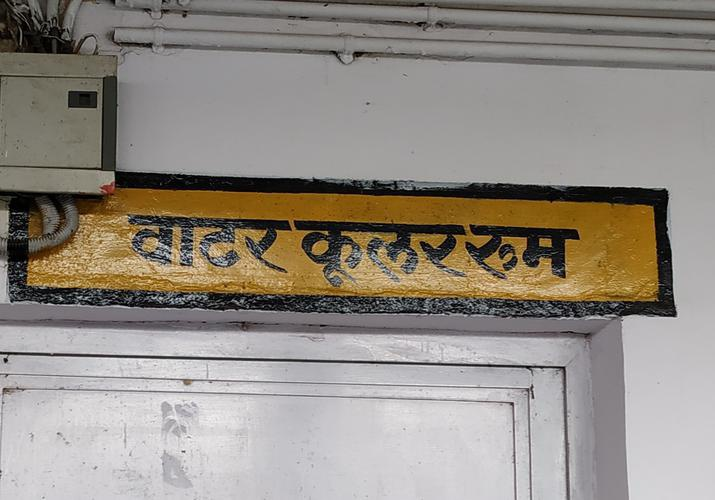

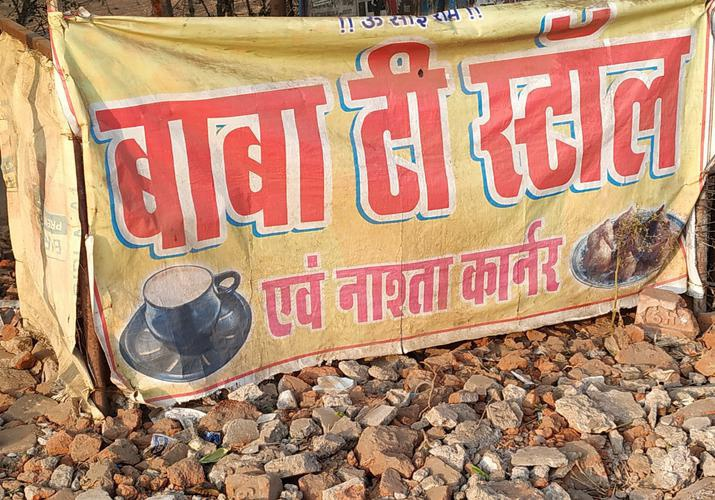

['0.jpg', '3.jpg']


In [ ]:
test_image = random.sample(list_of_images, 2)
for i in range(len(test_image)):
  img = cv2.imread(test_images_path + "/" + test_image[i])
  gcpimshow(img)
print(test_image)

In [ ]:
demo_image = test_image[0]
demo_image_path = test_images_path + "/" + demo_image

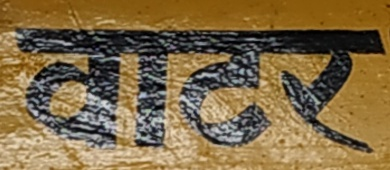

HINDI


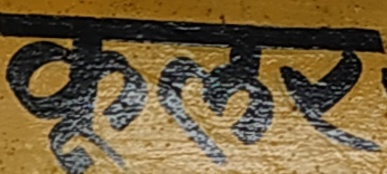

HINDI


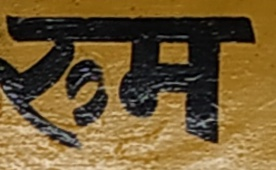

HINDI


In [ ]:
cropped_ims = detection_infer(demo_image_path)
for key, value in cropped_ims.items():
  crop_im = cv2.imread(key)
  gcpimshow(crop_im)
  print(value)

In [ ]:
source_scripts = recognition_infer(cropped_ims.keys())
print(source_scripts)

['वाटर', 'कूलर', 'रूम']


In [ ]:
target_scripts = transliteration_infer(source_scripts)
print(target_scripts)

['WATER', 'COOLER', 'ROOM']


In [ ]:
print('keep_notebook_alive')

keep_notebook_alive
